# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from random import uniform


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "cities.csv"

# Range of latitudes and longitudes
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)
cities_df.count()

City       0
Country    0
dtype: int64

## Generate Cities List

In [71]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    cities_df = cities_df.append({"City": city.city_name, "Country": city.country_code}, ignore_index=True)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

index      610
City       610
Country    610
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [72]:
#Create a df to add all the data from the API calls
column_names = ["City", "Country", "Temperature (F)", "Latitude", "Longitude", "Humidity (%)", "Cloudiness (%)", 
                "Wind Speed (mph)"]

clean_cities_df = pd.DataFrame(columns=column_names)

units = "IMPERIAL"

#loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
 
for index, row in cities_df.iterrows():
    city = row["City"]
    query_url = f"{url}appid={api_key}&units={units}&q="+city.replace(" ", "+")
    city_data = requests.get(query_url).json()
    #for exceptions
    if city_data["cod"] == "404":
        print("City not found, skipping......")
        
    
    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
              
        print("--------------")
        print("Processing: City #" , row_count, '|', city_data["name"], city_data["sys"]["country"])
        print(query_url)
        row_count += 1
        
#http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=metric&q=Beijing      

Beginning Data Retrieval
--------------
Processing: City # 1 | Torbay CA
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=torbay


C:\Users\mendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\mendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\mendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\mendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\mendi\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\mendi\Anaconda3\lib\s

--------------
Processing: City # 2 | Kandrian PG
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=kandrian
City not found, skipping......
City not found, skipping......
--------------
Processing: City # 3 | Nuuk GL
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=nuuk
City not found, skipping......
--------------
Processing: City # 4 | Bluff AU
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=bluff
--------------
Processing: City # 5 | Chuy UY
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=chuy
--------------
Processing: City # 6 | Balikpapan ID
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=balikpapan
--------------
Processing: City # 7 | Ushuaia AR
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f80

--------------
Processing: City # 51 | Kapit MY
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=kapit
--------------
Processing: City # 52 | Mahebourg MU
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=mahebourg
--------------
Processing: City # 53 | Iwanai JP
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=iwanai
--------------
Processing: City # 54 | Hauterive FR
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=hauterive
--------------
Processing: City # 55 | Linjiang CN
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=linjiang
--------------
Processing: City # 56 | Severo-Kurilsk RU
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=severo-kurilsk
--------------
P

City not found, skipping......
--------------
Processing: City # 103 | Lorengau PG
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=lorengau
City not found, skipping......
City not found, skipping......
--------------
Processing: City # 104 | Omboue GA
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=omboue
--------------
Processing: City # 105 | Mar del Plata AR
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=mar+del+plata
City not found, skipping......
--------------
Processing: City # 106 | Vangaindrano MG
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=vangaindrano
--------------
Processing: City # 107 | Straubing DE
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=straubing
--------------
Processing: City # 108 | 

--------------
Processing: City # 153 | Luganville VU
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=luganville
--------------
Processing: City # 154 | Santa Rosa AR
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=santa+rosa
--------------
Processing: City # 155 | Weiden DE
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=weiden
--------------
Processing: City # 156 | Saint-Joseph FR
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=saint-joseph
--------------
Processing: City # 157 | Carnarvon ZA
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=carnarvon
--------------
Processing: City # 158 | Fenoarivo MG
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=fenoarivo


--------------
Processing: City # 202 | Marathon CA
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=marathon
--------------
Processing: City # 203 | Taksimo RU
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=taksimo
--------------
Processing: City # 204 | Adrar DZ
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=adrar
--------------
Processing: City # 205 | Klaksvik FO
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=klaksvik
--------------
Processing: City # 206 | Vila IT
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=vila
--------------
Processing: City # 207 | Los Llanos de Aridane ES
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=los+llanos+de+aridane
------

--------------
Processing: City # 251 | Gualaquiza EC
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=gualaquiza
City not found, skipping......
--------------
Processing: City # 252 | Titay PH
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=titay
--------------
Processing: City # 253 | Vitre FR
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=vitre
--------------
Processing: City # 254 | Dunedin NZ
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=dunedin
--------------
Processing: City # 255 | Dali CN
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=dali
--------------
Processing: City # 256 | Alexandria US
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=alexandria

--------------
Processing: City # 300 | Peterborough GB
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=peterborough
--------------
Processing: City # 301 | Port-Gentil GA
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=port-gentil
--------------
Processing: City # 302 | Puerto Madryn AR
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=puerto+madryn
--------------
Processing: City # 303 | Boissy-Saint-Leger FR
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=boissy-saint-leger
--------------
Processing: City # 304 | Borogontsy RU
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=borogontsy
City not found, skipping......
--------------
Processing: City # 305 | Lozuvatka UA
http://api.openweathermap.org/data/2.5/weather?a

--------------
Processing: City # 349 | Umm Kaddadah SD
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=umm+kaddadah
--------------
Processing: City # 350 | Kudat MY
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=kudat
--------------
Processing: City # 351 | Sabang PH
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=sabang
--------------
Processing: City # 352 | Batagay RU
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=batagay
--------------
Processing: City # 353 | Gunjur GM
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=gunjur
--------------
Processing: City # 354 | Ginir ET
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=ginir
--------------
Processing: Cit

--------------
Processing: City # 398 | Champaign US
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=champaign
--------------
Processing: City # 399 | Lowestoft GB
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=lowestoft
--------------
Processing: City # 400 | Tigil RU
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=tigil
--------------
Processing: City # 401 | Nanyang CN
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=nanyang
--------------
Processing: City # 402 | Sunrise Manor US
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=sunrise+manor
--------------
Processing: City # 403 | Dejen ET
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=dejen
City not found, 

--------------
Processing: City # 448 | Mbanza-Ngungu CD
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=mbanza-ngungu
--------------
Processing: City # 449 | Cooma AU
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=cooma
--------------
Processing: City # 450 | Almaznyy RU
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=almaznyy
--------------
Processing: City # 451 | Bilgoraj PL
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=bilgoraj
--------------
Processing: City # 452 | Dukat RS
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=dukat
City not found, skipping......
--------------
Processing: City # 453 | Muzhi RU
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q

City not found, skipping......
--------------
Processing: City # 498 | Kyzyl-Suu KG
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=kyzyl-suu
--------------
Processing: City # 499 | Esmeraldas BR
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=esmeraldas
--------------
Processing: City # 500 | Acari BR
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=acari
--------------
Processing: City # 501 | Pacific Grove US
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=pacific+grove
--------------
Processing: City # 502 | Paragominas BR
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39617494909&units=IMPERIAL&q=paragominas
--------------
Processing: City # 503 | Srednekolymsk RU
http://api.openweathermap.org/data/2.5/weather?appid=66bbcddbc0f802b8b6c3a39

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:
clean_cities_df.count()

City                543
Country             543
Temperature (F)     543
Latitude            543
Longitude           543
Humidity (%)        543
Cloudiness (%)      543
Wind Speed (mph)    543
dtype: int64

In [74]:
#Reset the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Torbay,CA,54.97,47.66,-52.73,72,75,28.86
1,Kandrian,PG,75.58,-6.21,149.55,98,56,3.2
2,Nuuk,GL,24.04,64.17,-51.74,45,75,4.7
3,Bluff,AU,62.62,-23.58,149.07,79,0,9.64
4,Chuy,UY,73.33,-33.69,-53.46,80,20,8.23


In [75]:
#save to csv file
clean_cities_df.to_csv("City_Data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

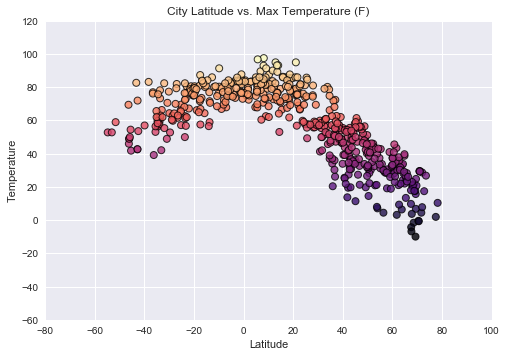

In [80]:
#Build scatter plot for Latitude vs. Temp
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o",
            cmap='magma', alpha=0.8, label="City")

#Add lables to scatter plot
plt.title("City Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.xlim([-80, 100])
plt.ylim([-60,120])

#Save figure
plt.savefig("Lat_v_Temp.png")

#show plot
plt.show()

#### Latitude vs. Humidity Plot

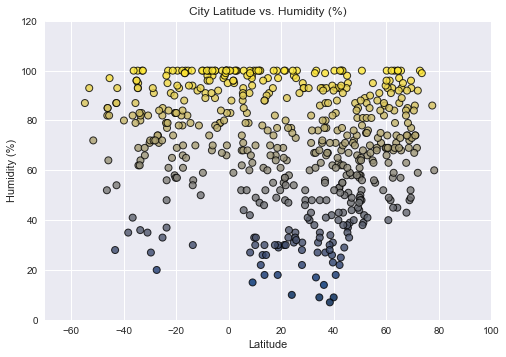

In [81]:
#Build scatter plot for Latitude vs. Temp
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o",
            cmap='cividis', alpha=0.8, label="City")

#Add lables to scatter plot
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim([-70, 100])
plt.ylim([0,120])

#Save figure
plt.savefig("Lat_Hum.png")

#show plot
plt.show()


#### Latitude vs. Cloudiness Plot

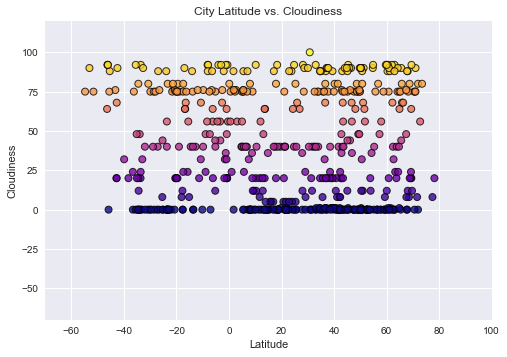

In [82]:
#Build scatter plot for Latitude vs. Temp
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o",
            cmap='plasma', alpha=0.8, label="City")

#Add lables to scatter plot
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim([-70, 100])
plt.ylim([-70,120])

#Save figure
plt.savefig("Lat_v_Clouds.png")

#show plot
plt.show()


#### Latitude vs. Wind Speed Plot

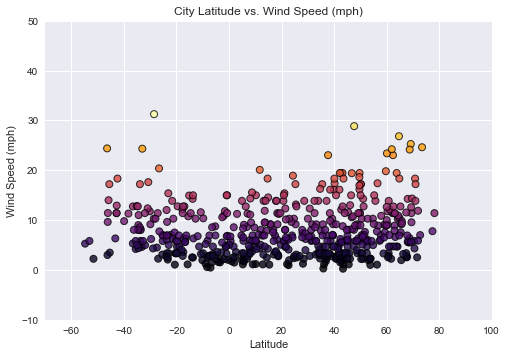

In [83]:
#Build scatter plot for Latitude vs. Temp
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o",
            cmap='inferno', alpha=0.8, label="City")

#Add lables to scatter plot
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim([-70, 100])
plt.ylim([-10,50])

#Save figure
plt.savefig("Lat_v_WindSpeed.png")

#show plot
plt.show()